In [620]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

# Import libraries necessary for Clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [621]:
# Read the dataset into a DataFrame
data=pd.read_csv('sleep and health lifecycle.csv')
data_c= data.copy() 

In [622]:
data= data.drop_duplicates()
data= data.dropna(axis=1)
data.sort_index(inplace= True)
data.drop_duplicates(subset='Age', keep='first', inplace=True) 
data['Sleep Duration']= data['Sleep Duration'].astype(int)
data= data.drop(columns=['Person ID', 'Blood Pressure'], errors='ignore')

In [623]:
# Set 'Age' as index
data= data.set_index("Age")

In [624]:
# Checking the NaN value count
data.isna().sum()

Gender                     0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Heart Rate                 0
Daily Steps                0
dtype: int64

In [625]:
# Find statistics of the DataFrame
data.describe()

,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,31.000000,31.000000,31.00000,31.000000,31.000000,31.000000
mean,6.774194,7.387097,56.16129,5.161290,70.903226,6558.064516
std,0.883541,1.308368,20.33076,1.809176,5.185588,1874.882075
min,5.000000,4.000000,30.00000,3.000000,65.000000,3500.000000
25%,6.000000,6.000000,41.00000,3.500000,68.000000,5000.000000
50%,7.000000,7.000000,55.00000,5.000000,70.000000,6000.000000
75%,7.500000,8.500000,75.00000,6.500000,74.000000,8000.000000
max,8.000000,9.000000,90.00000,8.000000,83.000000,10000.000000


## Pie Chart

In [626]:
index_values=[27, 28, 29, 30, 31]
filtered_data= data.loc[index_val] 
data_pie= filtered_data.head().copy()
data_pie[['Heart Rate']]

,Heart Rate
Age,
27,77
30,70
33,72
36,68
39,68


In [627]:
def plot_pie(data_pie):
    """
    Plots a pie chart of heart rate distribution across different age groups.

    Parameters: data_pie (pd.DataFrame): DataFrame with an index of age groups and a 'Heart Rate' column.
    """
    plt.figure(dpi=144)
    labels_with_age = [f'Age: {age}' for age in data_pie['Heart Rate'].index] 
    colors = ['#e6194B', '#3cb44b', '#ffe119', '#4363d8', '#f58231']
    plt.pie(data_pie['Heart Rate'], labels=labels_with_age, labeldistance=1.04, autopct='%1.1f%%', startangle=20, colors=colors)
    plt.title('Heart Rate Distribution Across Age Groups',pad=15,fontweight='bold')
    plt.legend(loc='upper right',bbox_to_anchor=(1.02, 0.7)) 
    plt.axis('Equal')
    plt.tight_layout()
    plt.show()

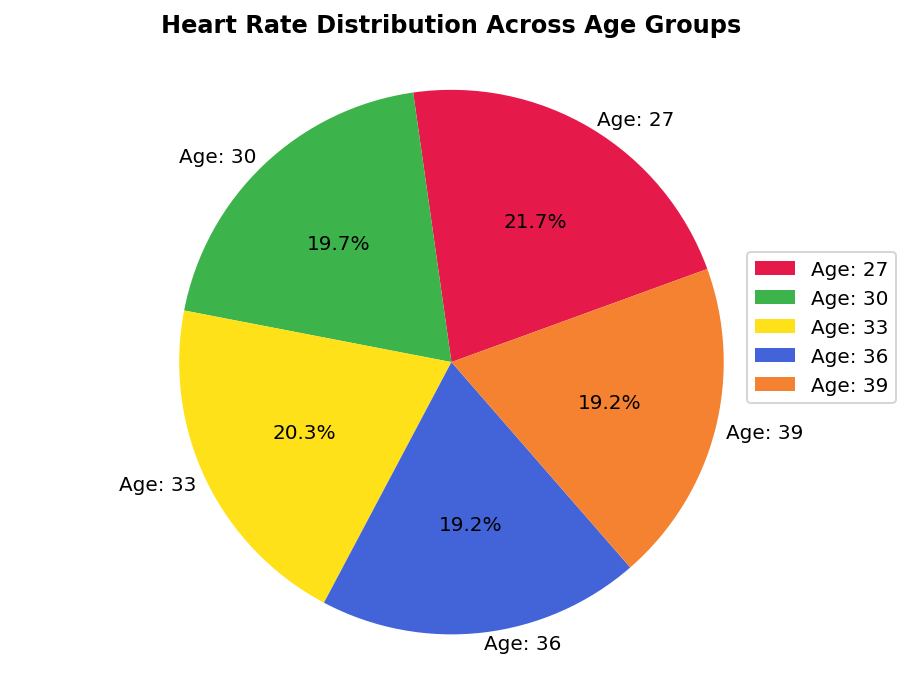

In [628]:
plot_pie(data_pie)

## Scatter Plot

In [629]:
index_val=[27, 30, 33, 36, 39, 42, 45, 48]
filtered= data.loc[index_val] 
plot_data_scatter= filtered.copy()
plot_data_scatter[['Sleep Duration', 'Stress Level']]

,Sleep Duration,Stress Level
Age,,
27,6,6
30,7,6
33,6,8
36,7,4
39,7,5
42,6,7
45,6,6
48,7,5


In [630]:
def plot_scatter(data, a, b):
    """
    Plots a scatter plot comparing 'Sleep Duration' and 'Stress Level' for different age groups.
    
    Parameters: data (pd.DataFrame): DataFrame with indices as age and columns 'Sleep Duration' and 'Stress Level'.
    """
    plt.figure(figsize=(13,7), dpi=144)
    plt.scatter(plot_data_scatter.index, plot_data_scatter['Sleep Duration'], color='red', s=100)
    plt.scatter(plot_data_scatter.index, plot_data_scatter['Stress Level'], color='blue', s=100)
    plt.xlabel("Age", fontsize=16, fontweight='bold')
    plt.ylabel("Frequency", fontsize=16, fontweight='bold')
    plt.title("Occupation Vs. Sleep Duration: Insights through Scatter Plot", fontsize=16, fontweight='bold', pad=19)
    x=[27, 30, 33, 36, 39, 42, 45, 48]
    plt.xticks(x, fontsize=14)
    plt.yticks(fontsize=14)
    plt.grid(linestyle='dashed')
    # plt.tight_layout()
    plt.show()

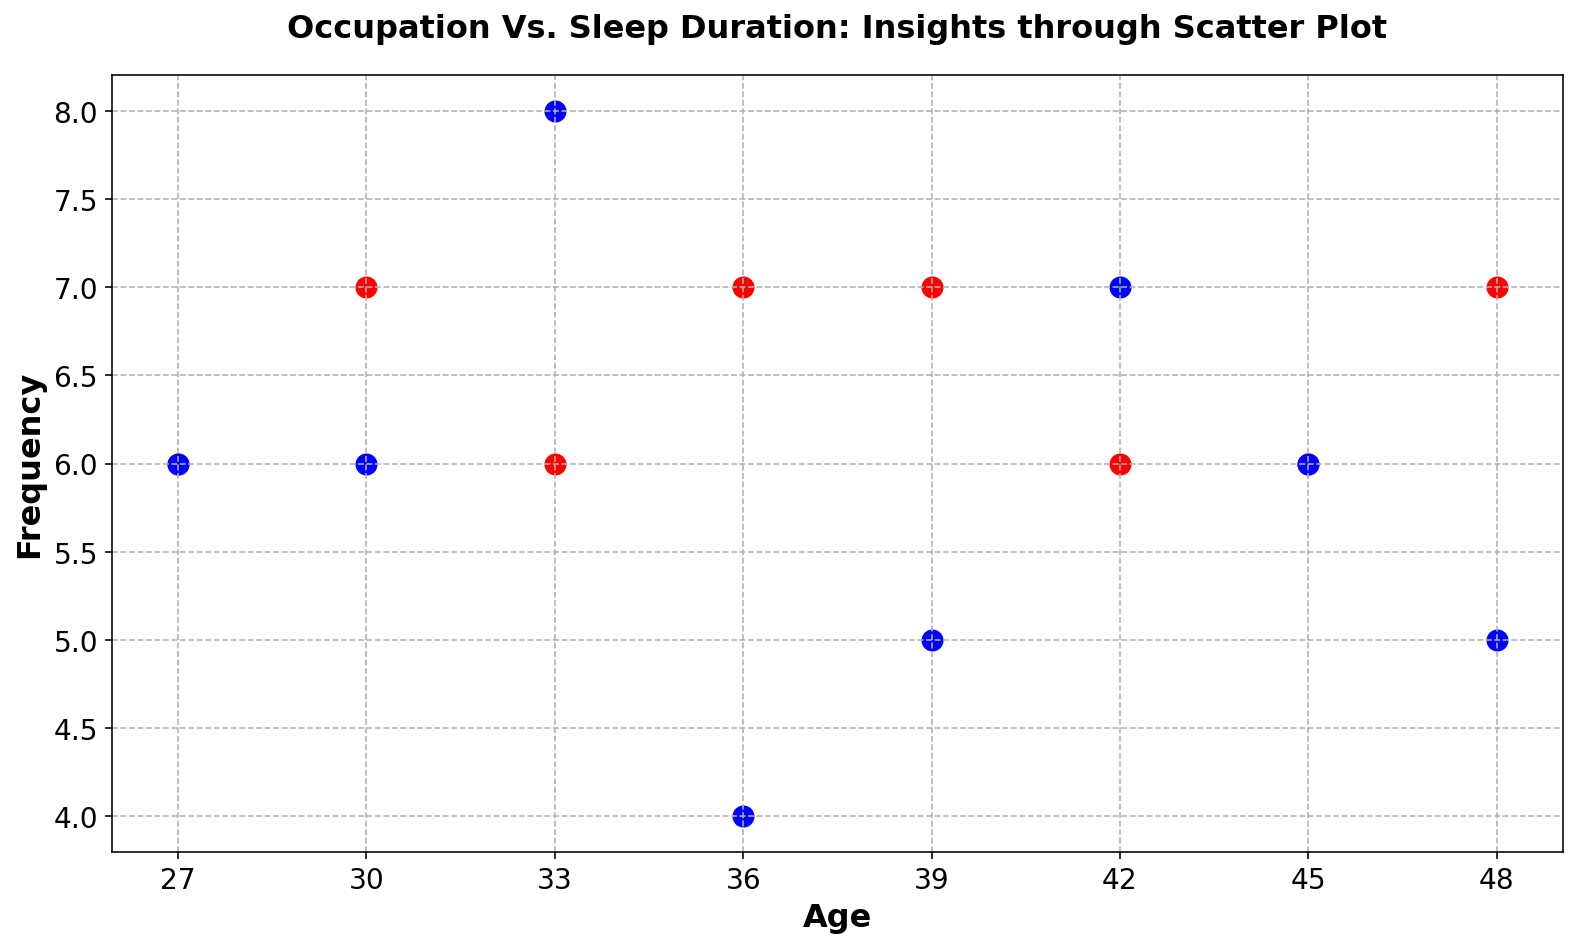

In [631]:
plot_scatter(plot_data, plot_data.index, 'Sleep Duration')

## Heat Map

In [632]:
selected_columns = ['Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']
heat_data        = data_c[selected_columns]

C:\Users\Fathima Azeez\Downloads\Anaconda\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


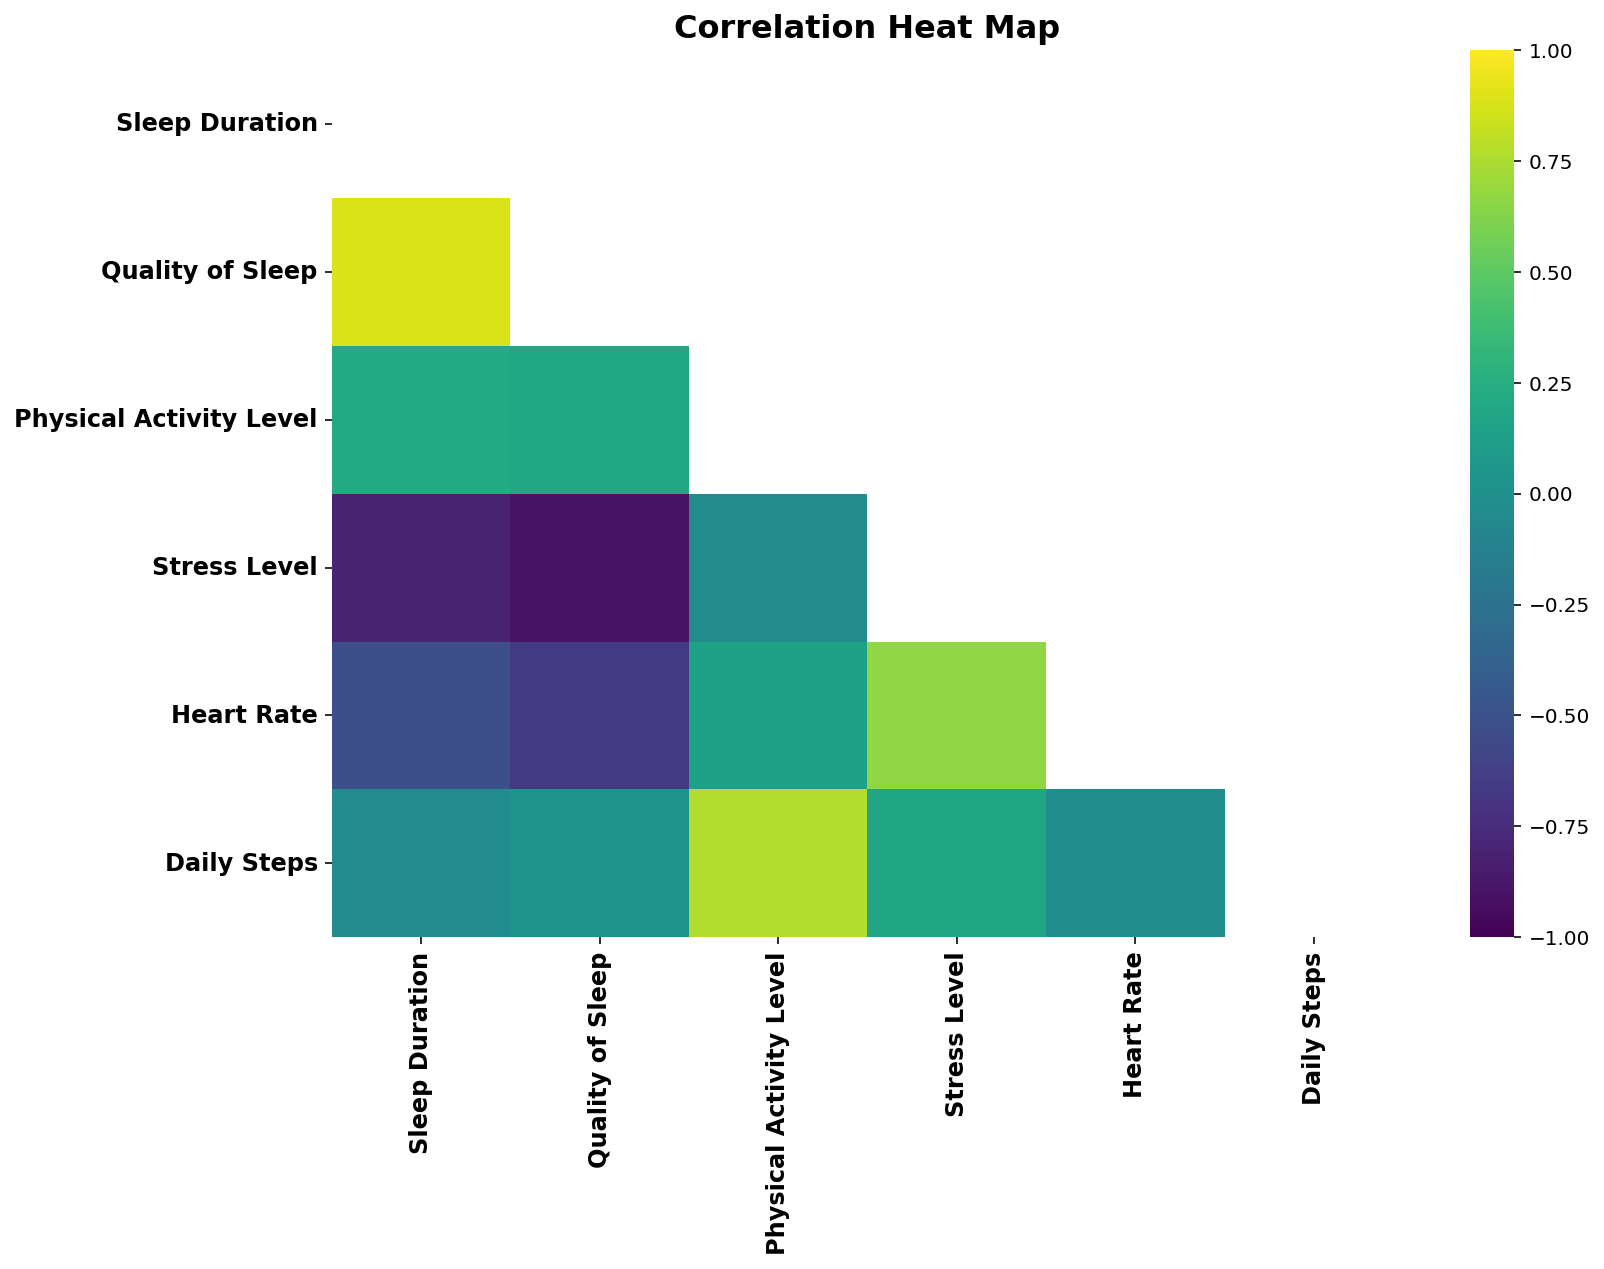

In [633]:
def plot_heat(data, method):
    """
    Plots a heatmap of the correlation matrix of the input data.

    Parameters: data (pd.DataFrame): The DataFrame for which the correlation matrix will be computed and plotted.
    method (str): The method used to compute the correlation ('pearson', 'kendall', 'spearman').
    """
    fig, ax = plt.subplots(dpi=144, figsize=(12, 8))
    
    # Compute the correlation matrix and use it to generate the mask
    correlation_matrix = heat_data.corr(method=method)
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    
    # Create the heatmap
    sns.heatmap(correlation_matrix, ax=ax, vmin=-1, vmax=1, cmap='viridis', annot=True, mask=mask)
    plt.title("Correlation Heat Map", fontweight='bold', fontsize=16)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, fontweight='bold')
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=12, fontweight='bold')
    plt.show()
    
# Plot the heatmap
plot_heat(heat_data, 'pearson')

In [634]:
correlation_matrix

,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
Sleep Duration,1.000000,0.883213,0.212360,-0.811023,-0.516455,-0.039533
Quality of Sleep,0.883213,1.000000,0.192896,-0.898752,-0.659865,0.016791
Physical Activity Level,0.212360,0.192896,1.000000,-0.034134,0.136971,0.772723
Stress Level,-0.811023,-0.898752,-0.034134,1.000000,0.670026,0.186829
Heart Rate,-0.516455,-0.659865,0.136971,0.670026,1.000000,-0.030309
Daily Steps,-0.039533,0.016791,0.772723,0.186829,-0.030309,1.000000


## Elbow Graph: K Means Clustering

C:\Users\Fathima Azeez\Downloads\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Fathima Azeez\Downloads\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Fathima Azeez\Downloads\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Fathima Azeez\Downloads\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.p

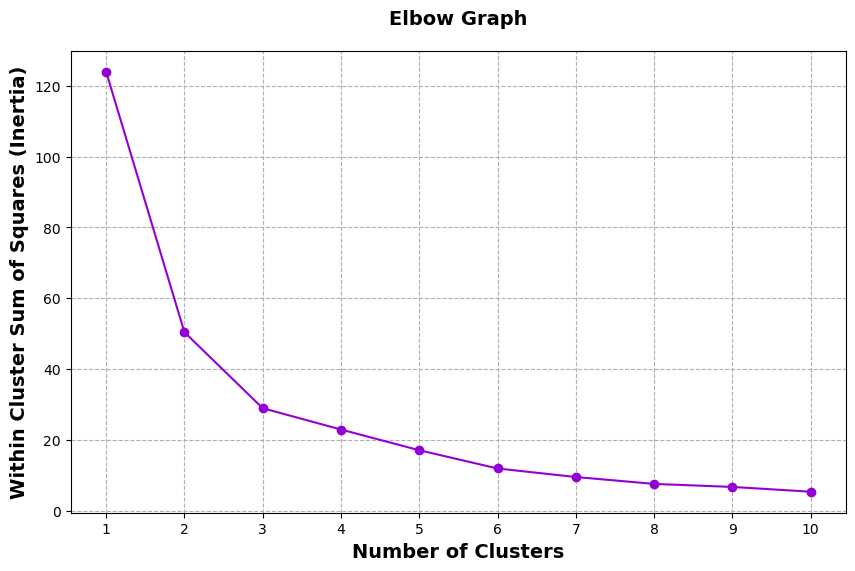

In [635]:
specs= data[['Sleep Duration', 'Quality of Sleep','Stress Level', 'Heart Rate']]

# Initialize the StandardScaler
scaler= StandardScaler()

# Fit and transform the selected specifications 
scaled_specs= scaler.fit_transform(specs)

k_values = range(1, 11)
inertia_values =[ ]

for k in k_values:
    kmeans= KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(scaled_specs)
    inertia_values.append(kmeans.inertia_)
    
# Plot the graph
plt.figure(figsize=(10,6))
plt.plot(k_values, inertia_values, marker='o', color='darkviolet', linestyle='-')
plt.title("Elbow Graph", fontsize=14, fontweight='bold', pad=19)
plt.xlabel("Number of Clusters", fontsize=14, fontweight='bold')
plt.ylabel("Within Cluster Sum of Squares (Inertia)", fontsize=14, fontweight='bold')
plt.xticks(k_values)
plt.grid(linestyle='dashed')
plt.show()

## K-Means Clustering

C:\Users\Fathima Azeez\Downloads\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


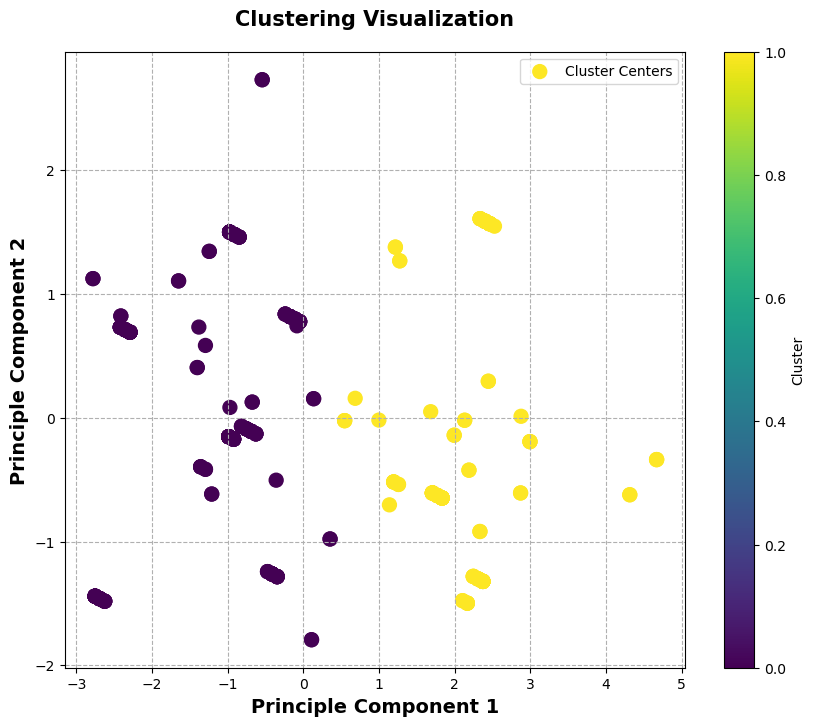

In [636]:
specs= data_org[['Sleep Duration', 'Quality of Sleep','Stress Level', 'Heart Rate','Physical Activity Level']]

# Initialize the StandardScaler
scaler= StandardScaler()

# Fit and transform the selected specifications 
scaled_specs= scaler.fit_transform(specs)

pca= PCA(n_components=2)
p_components= pca.fit_transform(scaled_specs)

k=2

kmeans= KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(p_components) 
cluster_labels= kmeans.labels_

plt.figure(figsize=(10,8))
plt.scatter(p_components[:,0], p_components[:,1], marker='o', s=100, c=cluster_labels, cmap='viridis', label='Cluster Centers')
plt.title('Clustering Visualization', fontsize=15, fontweight='bold',pad=19)
plt.xlabel("Principle Component 1", fontsize=14, fontweight='bold')
plt.ylabel("Principle Component 2", fontsize=14, fontweight='bold')
plt.grid(linestyle='dashed')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()

## Line Fitting

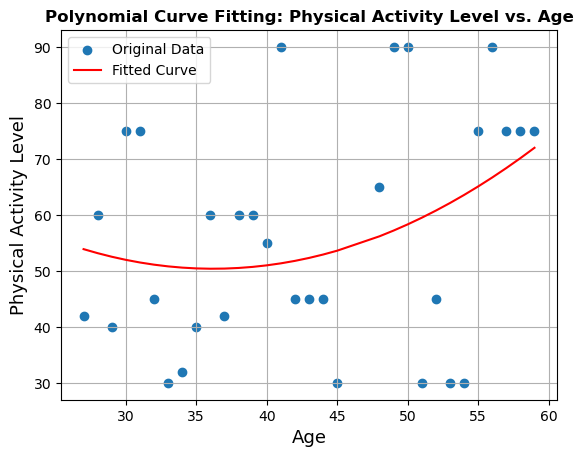

Optimized Parameters:
a = 0.04148719270765111
b = -3.0023430527997403
c = 104.70920252644135


In [638]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Assuming your data is in DataFrame format
# Extracting data from DataFrame
age = data.index.values  # Assuming age is the index
physical_level = data['Physical Activity Level'].values

# Define the polynomial function you want to fit
def polynomial_function(x, a, b, c):
    return a * x**2 + b * x + c

# Concatenate all data
x_data = age  # X data will be age
y_data = physical_level  # Y data will be body fat

# Perform curve fitting
popt, pcov = curve_fit(polynomial_function, x_data, y_data)

# Extract optimized parameters
a_opt, b_opt, c_opt = popt

# Plot original data and fitted curve
plt.scatter(x_data, y_data, label='Original Data')
plt.plot(x_data, polynomial_function(x_data, a_opt, b_opt, c_opt), label='Fitted Curve', color='red')
plt.xlabel('Age', fontsize=13)
plt.ylabel('Physical Activity Level', fontsize=13)
plt.title('Polynomial Curve Fitting: Physical Activity Level vs. Age', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True)
plt.show()

# Print optimized parameters
print("Optimized Parameters:")
print("a =", a_opt)
print("b =", b_opt)
print("c =", c_opt)